# Classical Statistical Inference: Part 1

## Table of Content:

- I. [Basic probability concepts](#I)    
    * I.1 [Probability axioms](#I.1-Probability-axioms)
    * I.2 [What is a conditional probability and what is the Bayes theorem ?](#I.2-What-is-a-conditional-probability-and-what-is-the-Bayes-theorem-?)
    * I.3 [What is a random variable ?](#I.3-What-is-a-random-variable-?)
    * I.4 [What is a probability density function ?](#pdf)
    * I.4b [pdf, conditional probability and Bayes rule](#bayes)
    * I.5 [What is a cumulative density function ?](#I.5-What-is-a-cumulative-density-function-?)
    * I.6 [Working with pdf and CDF](Basic-statistics_02.ipynb)

- X. [References and supplementary material](#X)

In [2]:
# Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## I Basic (probability) concepts:  <a class="anchor" id="I"></a>


### I.1 Probability axioms

First of all, let's remind us that in probability theory:
- the set of all possible outcomes of an experiment is generally called **sample space** and denoted, $\Omega$. 
- Points in $\Omega$, are called **realisations** (or sometimes also **sample outcomes**) $\omega$. 
- An **Event** is a subset of $\Omega$ (i.e. a subsample of the $\omega$).
- $p(A)$ is the **probability** of an event A. ($p(A)$ can also refer to a probability that a value of $x$ falls in a d$x$ wide interval around $x$. )

Example: We measure the magnitude *m* of a variable star. Then $\Omega = {\rm I\!R}$ (or some plausible range such as $]-30, 40 [ $, but this makes little difference in practice and $\Omega$ can in general be larger than needed). $\omega$ is a value in $\Omega$. While an event is the ensemble of magnitude measurements that are e.g. such that $m_i > 15$ and $m_i <=15.5$, hence this *event* is A = ]15, 15.5]. Note that an event *can* also be a single point (i.e. A = [17.]). 

To qualify as a probability, $p(A)$ must satisfy the three following axioms (also called [Kolmogorov](https://fr.wikipedia.org/wiki/Andre%C3%AF_Kolmogorov) axioms):
1. $p(A) > 0$ for each A. 
2. $p(\Omega) = 1$
3. If ($A_1, A_2, A_3, ...$ are disjoint events), then   
$$
p\left(\bigcup_{i=1}^{\inf} {A_i}\right) = \sum_{i=1}^{\inf} p(A_i), 
$$
where $\cup$ stands for **union**. 

As a consequence of these axioms, several useful rules can be derived such as the *sum rule*:
$$
p(A \cup B) = p(A) + p(B)-p(A \cap B)
$$
where $\cap$ stands for **intersection**. Note that in some stats books, you may see $p(A \cap B)$ written $p(AB)$. 

This sum rule, avoids double counting the intersection when calculating the probability the *both* A and B happen (i.e. $A \cup B$) as illustrated on the figure below (based on Fig. 3.1. of our reference [book](#book)). 

#### Illustration of the *sum rule*: 
![From astroML book](Figures/Sum_of_probabilities_2.png)

### I.2 What is a conditional probability and what is the Bayes theorem ? 

#### Definition: 

Assuming that $p(B) > 0$, the **conditional probability** of A given B (that we write $p(A \, | \, B)$ ), is defined as: 
$$
p(A \, | \, B) = \frac{p(A \, \cap \, B)}{p(B)}
$$

In other words, the conditional probability of A *given* B is **the fraction of the times A occurs when B occurs**. 

If A and B are independent events, $p(A \cap B)$ seen as the probability that *both* A and B will happen, is equal to:    
$$
p(A \cap B) = p(A \,|\, B)~ p(B) = p(B \,|\, A)~ p(A).
$$

Having "A given B" means that we consider events A given that B is True.

As we see here, *in general*  $p(A \, | \, B) \ne p(B \, | \, A)$. The probability to have feaver given you have a flew is close to 1, but the probability you have a flew given you have fever is surely lower than 1 !  

One can re-write the above expression the following way:

$$
p(A\,|\,B) = \frac{p(B\,|\,A) \, p(A)}{p(B)}
$$

This expression, devised by reverand Bayes during the 16th century, what is called the **Bayes theorem**.   
Note that we can see A as some observation and B as some model parameters ... We'll discuss this idea in a future lecture. 

#### Law of total probability: 

If events $B_i$ ($i=$1, 2, ... N) are *disjoint*, and their *union* is the set of all possible outcomes (i.e. $p(\cup_{i=1}^N B_i) = 1$) then:
$$
p(A) = \sum_i p(A\,\cap\,B_i) = \sum_i p(A \,|\, B_i)~p(B_i)
$$
This expression is known as the **law of total probability**. 

#### Conditional probability and law of total probability: 

Conditional probabilities also satisfy the law of total probability. Assuming that an event C is not mutually exclusive with A, or any B_i, then:   
$$
p(A \, | \, C) = \sum_i p(A \,|\,C \,\cap \, B_i)~p(B_i \,| C)
$$

We'll come back to conditional probabilities later.

**Note:** Those probability axioms and lemma are accepted by both frequentist and bayesian statisticians. The difference between those "two schools" come from the *interpretation* of probabilities of an event A, and of conditional probabilities.

### I.3 What is a random variable ?

In statistical inference, we are dealing with *data*. How do we link *sample space* and *events* to data ? The link is the concept of of *random* (or *stochastic*) variable.  

#### Definition: 

Mathematically, a random variable is a *mapping* 
$$
X: \Omega \to {\rm I\!R}
$$
that assigns a real number $X(\omega_i)~$ to each outcome $\omega$. 

A less formal definition is simply that a random variable is a variable whose value results from the measurement of a quantity that is subject to random variations. 

**Example:** You roll a dice. You can then define $X(\omega)$ be the *number of times you draw an even number* in a sequence $\omega$. Imagine you have rolled your dice 10 times, and get  $\omega = {1, {\bf 2, 4, 2}, 5, {\bf 4, 6}, 3, 3, 1 }$. Then $X(\omega) = 5$ is the value taken by your *random variable* X. 

Note that you can have either *continuous* or *discrete* random variables. If they form a countable set, they are discrete. They are continuous otherwise. 

**Warning**, a random variable is *NOT* like typical mathematical variables as it can take *different values* (each with an associated probability). In litterature, you will generaly find random variables written with *CAPITAL* letters, and their particular *realization* with *lowercase*. A realization of a random variable is also called "random variate". 

### I.4 What is a probability density function ? <a class="anchor" id="pdf"></a>

We will generally be dealing with probability *densities*, that is, $p(x)\,\rm{d}x$ is the probability of a value falling between $x$ and $x \,+\, \rm{d}x$.

Probability densities are normalized such that the union of all possible events has a probability of unity; mathematically that criterion looks like this:

$$
\int p(x)\,\rm{d}x = 1
$$

Among other things, consider the **units** implied by this expression: because probability is dimensionless, the *units of $p(x)$* must be the *inverse of the units of $x$*.
This can be very useful to keep in mind as you manipulate probabilistic expressions!


#### (Formal) definition:  

Let's first define a function that is such that $H_X(x_0)$ expresses the probability for a random variable $x < x_0$. We would have, by definition, $H_X(-\infty) = 0$ and $H_X(+\infty) = 1$.   
We can then define the **probability density function** (aka **pdf**) $h_X(x)$ as:

$$
h_X(x) = \frac{{\rm d}H_X(x)}{{\rm d}x}
$$

It results that:

$$
p(x\, \in [x, x+{\rm d}x[) \, = \, H_X(x) - H_X(x+{\rm d}x) = h_X(x)\, {\rm d}x
$$

Hence, the **probability density function** (aka **pdf**) $h_X(x)$ is a function that quantifies the probability that the value of a random variable $X$ falls between $x$ and $x+{\rm d}x$. That probability equals to $h_X(x)\,{\rm d}x$. The term *probability distribution* or *differential distribution function* is also used (especially by astronomers ...).

We can generalize to multiple variables. The probability for $x < x_0$, and $y < y_0$ is $H(x_0, y_0)$ and the associated pdf is $h(x_0, y_0)\, {\rm d}x \, {\rm d}y$. The two random variables are independant if $h(x, y) = f(x)~g(y)$ for all values of $x$ and $y$. Note that when two independent random variable are *independently* drawn from the same distribution (i.e.  $h(x, y) = f(x)~f(y)$), one speaks of **independent identically distributed** (iid) random variables. In this case, we obviously have $p(x, y)\,=\,p(x)~p(y)$


#### Definition addendum:

In cases where random variables are **discrete** ($H_X(x)$ is then an ensemble of delta functions that are not differentiable), one rather speaks of **probability mass function** (pmf). In this case, $X$ may take a (finite) number of values ${x_1, x_2, ..., x_n}$ and the mass function is simply:
$$
h_X(x) = p(X\,=\,x)
$$

The Poisson or Bernouilli distribution are examples of pmf. 

As the statistical context of the lectures is clear, we also generally drop the index "X", that is there to stress that we speak of a function of a random variable (and not of a normal mathematical variable) when writing the pdf. Hence, we will write $h(x)$ instead of $h_X(x)$. 

**Example:**    
You know several pdf, such as the *uniform* and the *normal* (aka gaussian) pdf.  
A *uniform* pdf is such that:

$$
\begin{array} \\ 
   h(x)    & = \frac{1}{b-a} \,\, {\rm{if}}\,a\,\leq\,x\,\leq\,b \\
   h(x)    & = 0 \,\,\, {\rm{otherwise} }  \\
\end{array}
$$

The gaussian pdf of mean $\mu$ and standard deviation $\sigma$ is:

$$
h(x ; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp \left( -\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)
$$

It is important to keep in mind that, as a probability can't be larger than 1, the integral of $h(x)$ over that integration domain has to be 1, otherwise we do not have a properly normalised pdf. This explains the  normalisation $1/\sqrt{2\pi}\,\sigma$ in front of of the gaussian pdf. 

#### Relevance of pdf for statistical inference:

Probability density function is at the heart of data mining, and data analysis in general. A key question is indeed to figure out what is the pdf $h_X(x)$ that is behind an observed set of random variables. I.e. we generally try to answer the question "From which pdf $h(x)$ are drawn my $x$ ?" 

Following the convention of our [reference book](#book), we use $h(x)$ when we refer to the *true* pdf (or **population ** pdf), and $f(x)$ when we refer to its *data* derived estimate (**empirical** pdf). Since $x$ are generally measured with errors, it may be that $f(x)$ does not tend to $h(x)$ even for an infinite number of measurements (we end up with a "blurred" or "broadened" version of the pdf). Because $h(x)$ gives the probability that $x$ falls in an (infinitely) small interval $x, x+{\rm{d}}x$, the pdf is also sometimes written $p(x)$ (cf Chapter 3 of our [reference book](#book)). 

As we said, $f(x)$ is a *model* of the *true* distribution $h(x)$. We observe data points that are *samples* of the true distribution $h(x)$. In general, we do not know $h(x)$ and we have to guess its functional form. This function form can either be "parametric" (e.g. a gaussian) or "non parametric" (e.g. a sum of small gaussians that mimic a more complex pdf). 

#### Python implementation

A large number of distribution functions are implemented in `scipy.stats`, such as the binomial distribution, poisson distribution, gaussian distribution, chi2, Cauchy distribution, ... To use them you simply have to:     

1) **Create an object "distribution"** with some fixed parameters:    
e.g. 
``` python
# Create a gaussian function with parameters mu=0, sigma=2
g = scipy.stats.norm(0, 2)  

# Poisson distribution for 10 events
pois = scipy.stats.poisson(10)  
```

**Note:** The help of `scipy` distribution generally refers to the `loc` and `scale` keywords associated to the distribution. The `loc` corresponds to the `mean` (i.e. expectation value of order 1 moment) and the `scale` corresponds to the `standard deviation`. 

In [3]:
g = scipy.stats.norm(0, 2)   # Equivalently use: g = scipy.stats.norm(loc=0, scale=2.)
g

2) Calculate **properties associated to this object** using a set of *specific methods*. For the pdf, use the method pdf: 
``` python
# Evaluate the pdf / pmf associated to our objects g / pois at "position" x / k

g_pdf = g.pdf(x) # x is either a numpy array or a specific value

pois_pmf = pois.pmf(k)  # k is an array of integers or a specific value
```

In [4]:
# Use this cell to plot the pdf associated with the gaussian distribution you have generated above
x = np.linspace(-5, 5, 100)

Other properties of the object (mean, std, moments, ...) can be calculated as we will see later. It is also possible to draw a random sample that follows the distribution we want to use using `scipy.stats.distribution.rvs()`:
``` python
# Generate a sample of 1000 points drawn from a gaussian distrib:
g_sample = g.rvs(1000)  

# Generate a sample of 10 points drawn from a poisson distrib:
pois_sample = pois.rvf(10) 
```

See Sect. 3.2 of our reference [book](#book) for an overview of the main distributions implemented in scipy. 

In [5]:
# Use this cell to generate a random sample of points drawn from the gaussian distribution you defined above
# Plot an histogram with the sample of points you have generated. 

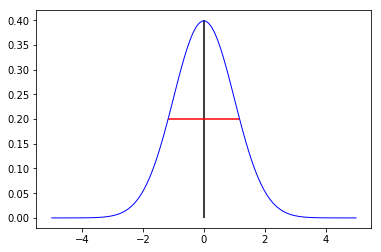

In [6]:
# Illustration of a canonical gaussian pdf and overplot of a line showing its FWHM 
f, ax = plt.subplots(nrows=1)
n = scipy.stats.norm(0, 1)
x=np.linspace(-5,5, 100)
g_pdf = n.pdf(x)
ax.plot(x, g_pdf, lw=1, color="blue")
ax.vlines(0, 0,0.4)
ax.hlines(0.2, -np.sqrt(2*np.log(2)), np.sqrt(2*np.log(2)), color='red')

### I.4b pdf, conditional probability and Bayes rule for bivariate distributions:  <a class="anchor" id="bivariate"></a>


When we have 2 *continuous random variables*, we can write: 
    
$$
p(x,y) = p(x\,|\,y) \, p(y) = p(y\,|\,x) \, p(x)
$$

Such a distribution of 2 random variable is called a **bivariate distribution**. 

The *marginal probability* $p(x)$ (resp $p(y)$) is obtained by integrating $p(x, y)$ over all the probabilities to have obtained $y$ (resp $x$): 

$$
p(x) = \int p(x,y) \, {\rm d}y 
$$
$$
p(y) = \int p(x,y) \, {\rm d}x
$$

Hence, we have: 

$$
p(x)= \int p(x\,|\,y) \, p(y)  \, {\rm d}y
$$

$$
p(y\,|\,x) = \frac{p(x\, | \, y) \, p(y)}{p(x)} = \frac{p(x\, | \, y) \, p(y)}{\int p(x\,|\,y) \, p(y)  \, {\rm d}y}  
$$

For a non continuous variable (let's say ${y_j}$ with $j=1, ..., M$), the integral becomes a sum:

$$
p(y_j\,|\,x) = \frac{p(x\, | \, y_j) \, p(y_j)}{p(x)} = \frac{p(x\, | \, y_j) \, p(y_j)}{\sum_{j=1}^M \, p(x\,|\,y_j) \, p(y_j) }  
$$

For bi-(multi-)variate distributions, $p(x,y)$, one also defines the **covariance** (assume $<x>\,=\,<y>\,=\,0$):

$$
Cov(x,y) = <xy> = \int_{-\inf}^{+inf}\int_{-\inf}^{+inf} x y\,p(x,y) \rm{d}x\rm{d}y
$$

We can also define a dimensionless **correlation coefficient** (assuming zero mean): 

$$
r = \frac{<xy>}{\sqrt{<x^2><y^2>}} . 
$$

if $r = 1$ ($r = -1$) the two RV are (anti-)correlated, and independent if $r=0$. 

#### Example

Use of `scipy.stats.multivariate_normal()` for a multivariate gaussian distribution 

Text(0.5,1,u'$p(y | x =2.00 )$')

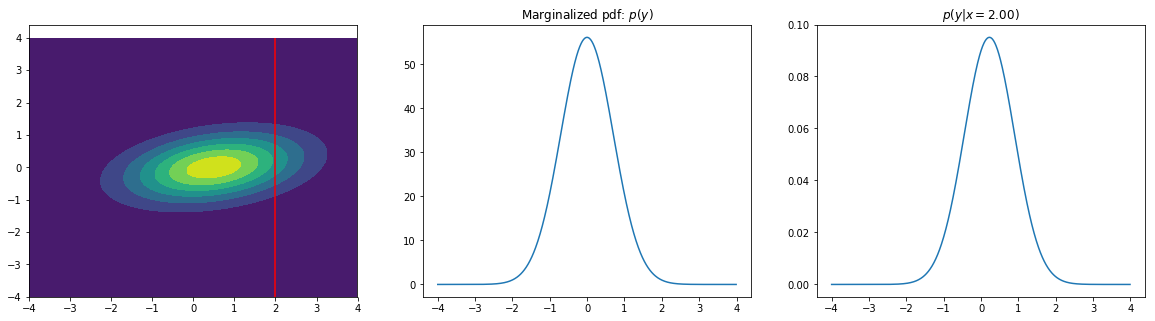

In [76]:
x, y = np.arange(-4.,4.,0.01), np.arange(-4,4.,0.01)
X, Y = np.meshgrid(x,y)
# X, Y = np.mgrid[-4:4:.01, -4:4:.01]    # Alternative command to generate a meshgrid!
# I now create a 3D array containing the X and Y coordinates
pos = np.zeros(X.shape + (2,))   
pos[:, :, 0] = X
pos[:, :, 1] = Y
# define xid: index of xarray for which I want to know the conditional pdf p(y | x)
xid = 600
# Non isotropic bivariate distribution
n_2d = scipy.stats.multivariate_normal(mean=[0.5, 0.], cov=[[2.0, 0.3], [0.3, 0.5]])
f, ax = plt.subplots(figsize=(20,5), ncols=3)
ax[0].contourf(X, Y, n_2d.pdf(pos))
ax[0].vlines(x[xid], -4, 4, color='red')
# Calculates the marginalised pdf
ax[1].plot(y, n_2d.pdf(pos).sum(axis=1))  # I sum over the x axis 
ax[1].set_title('Marginalized pdf: $p(y)$')
# Plot p(y | x=xval)
ax[2].plot(y, n_2d.pdf(pos)[:, xid])
ax[2].set_title('$p(y | x =%.2f )$'%x[xid])

### I.5 What is a cumulative density function ? 


The *integral of a pdf* is called **cumulative density function**. 
$$
p(X \leq x) = H(x) = \int_{-\infty}^{x}\, h(x') \, {\rm d}x'
$$

Hence, the CDF if basically the function $H_X(x)$ we have defined in the first place to introduce the pdf. 

Obviously/by definition, we have that the integral of H(x) (i.e. between $-\infty$ and $+\infty$) is equal to 1.

The CDF provides a direct way to derive the *p% quantile* of a distribution, $q_p$ defined as:

$$
\frac{p}{100} = \int_{-\infty}^{q_p} h(x) dx
$$

$q_{25}$, $q_{50}$ and $q_{75}$ are commonly called the first, second and third *quartile* or 25 / 50 / 75 *percentile* of the distribution. $q_{75} - q_{25}$ is called *interquartile range* and provides a robust estimate of the width of a distribution.  

Note that *lowercase* letters are used for probability density (differential distribution) functions (pdf), and upper case for their cumulative counterpart (CDF).

**Example**:

An important CDF is the one of the gaussian distribution:

$$
P(x\,|\,\mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} ~ \int_{-\infty}^{x} \exp \left( -\frac{1}{2}\frac{(x'-\mu)^2}{\sigma^2}\right) {\rm d}x'. 
$$

This function is generally evaluated in terms of what is called the *Gauss error function* :   
$$
erf(z) = \frac{2}{\sqrt{\pi}}~\int_0^z \exp(-t^2)\,{\rm{d}}t.
$$

This function can be evaluated using `scipy.special.erf()`. 

Using the error function, the CDF of a Gaussian distribution can be re-written:

$$
P(x\,|\,\mu, \sigma) = \frac{1}{2}~\left( 1 \pm erf \left( \frac{|x-\mu|}{\sqrt{2}\sigma} \right)  \right),
$$

with "+" sign if $x > \mu$, and "-" sign if $x<\mu$. 

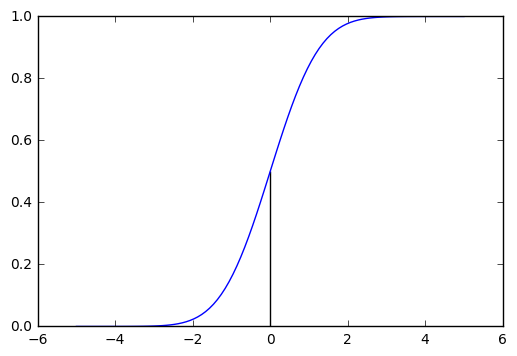

In [3]:
# CDF of a gaussian
f, ax = plt.subplots(nrows=1)
n = scipy.stats.norm(0, 1)
x=np.linspace(-5,5, 100)
g_cdf = n.cdf(x)
ax.plot(x, g_cdf, lw=1, color="blue")
ax.vlines(0, 0,0.5)

**Exercise:**

- What should be $erf(\infty)$ ? (Don't do any calculation !).
- From the above definition, it is clear that:

$$
p(a < x < b\,| \,\mu, \sigma) = P(b \, | \,\mu, \sigma)-P(a \,| \, \mu, \sigma)
$$

Derive the probability that $p(\mu - M\,\sigma < x < \mu + M \, \sigma)$ for M = 1, 2, 3.  
- What is the interquartile range $q_{75} - q_{25}$ for a Gaussian/Normal distribution of standard deviation $\sigma$  ?  (Tip: Inverse of the error function in python can be imported as `scipy.special import erfinv`)

## Intermezo: Descriptive statistics

See the Notebook [Descriptive_statistics.ipynb](Descriptive_statistics.ipynb) for characteristics and properties of common distributions encountered in science

## X. References and supplementary material: <a class="anchor" id="X"></a>

* **Chapter 1** (1.2), **Chapter 3 ** (3.1, 3.2) and **Chapter 4 ** (4.1 to 4.3) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).  

* Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 2 **

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**, **Chapter 18.7** 

